In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def plot_csv_as_timeseries(filename):
    # Read the CSV data
    df = pd.read_csv(
        filename, delimiter=";", header=None, names=["col1", "col2", "col3", "time"]
    )

    # Plot the time series using the index as X-axis
    plt.figure(figsize=(30, 5))
    plt.plot(df.index, df["time"], marker="o", linestyle="-", color="b")
    plt.title("Time Series Plot")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.grid(True)
    plt.tight_layout()
    avg_value = df["time"].mean()
    std_value = df["time"].std()
    # Show the plot
    # plt.show()
    print(f"Average: {avg_value}")
    print(f"Standard Deviation: {std_value}")

../src/new-experiments/auto-600-200-Features.csv
Average: 0.02719171282254629
Standard Deviation: 0.15696589799615038

../src/new-experiments/auto-600-200-RawExtract.csv


Average: 0.08115350427506132
Standard Deviation: 0.31762794514250203

../src/new-experiments/auto-600-400-Features.csv
Average: 0.10810129580812955
Standard Deviation: 0.48756312757087905

../src/new-experiments/auto-600-400-RawExtract.csv
Average: 0.13942522064234236
Standard Deviation: 0.5195186017839909

../src/new-experiments/auto-600-600-Features.csv
Average: 0.4003718654648375
Standard Deviation: 1.3231157466170476

../src/new-experiments/auto-600-600-RawExtract.csv
Average: 0.2438975766413518
Standard Deviation: 0.7251595965185533



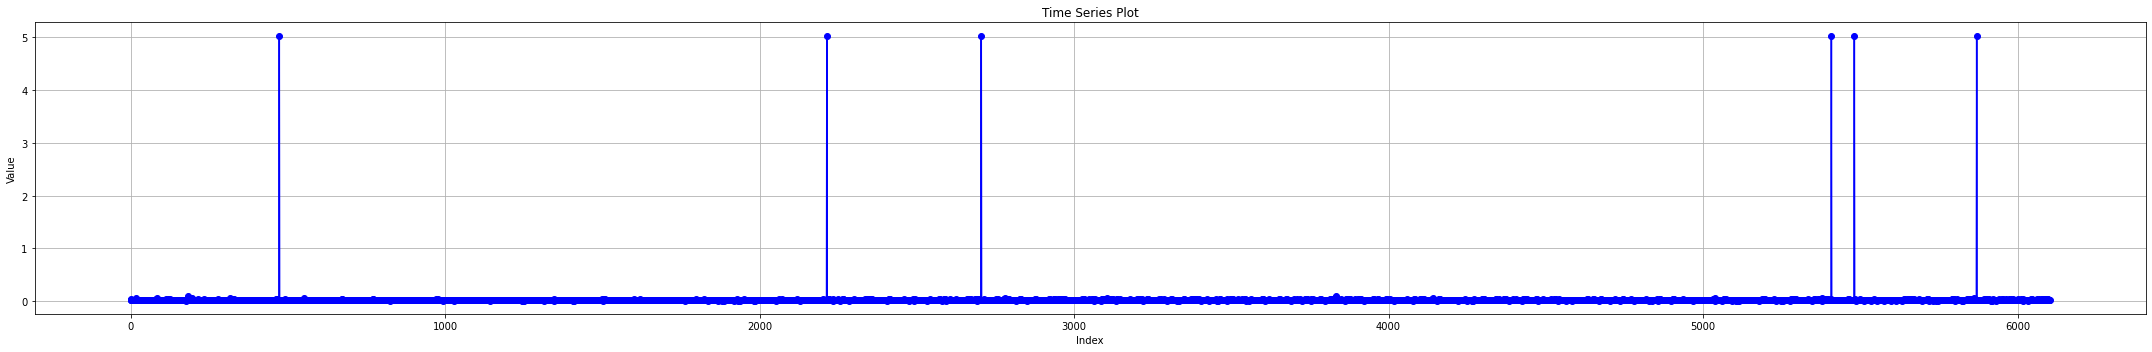

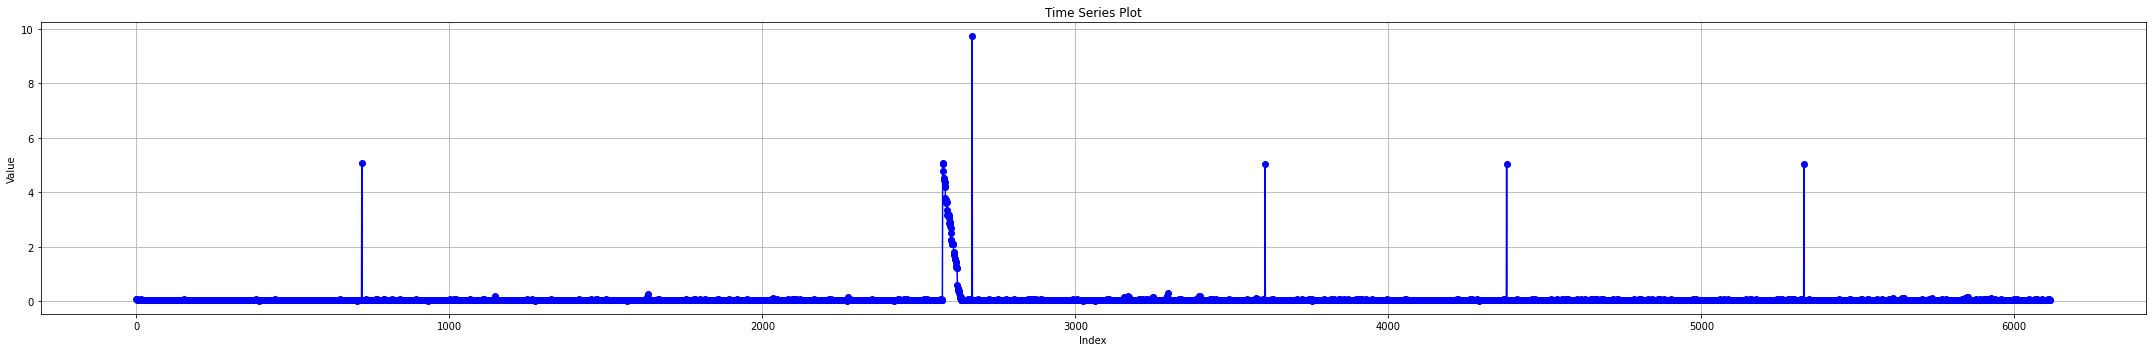

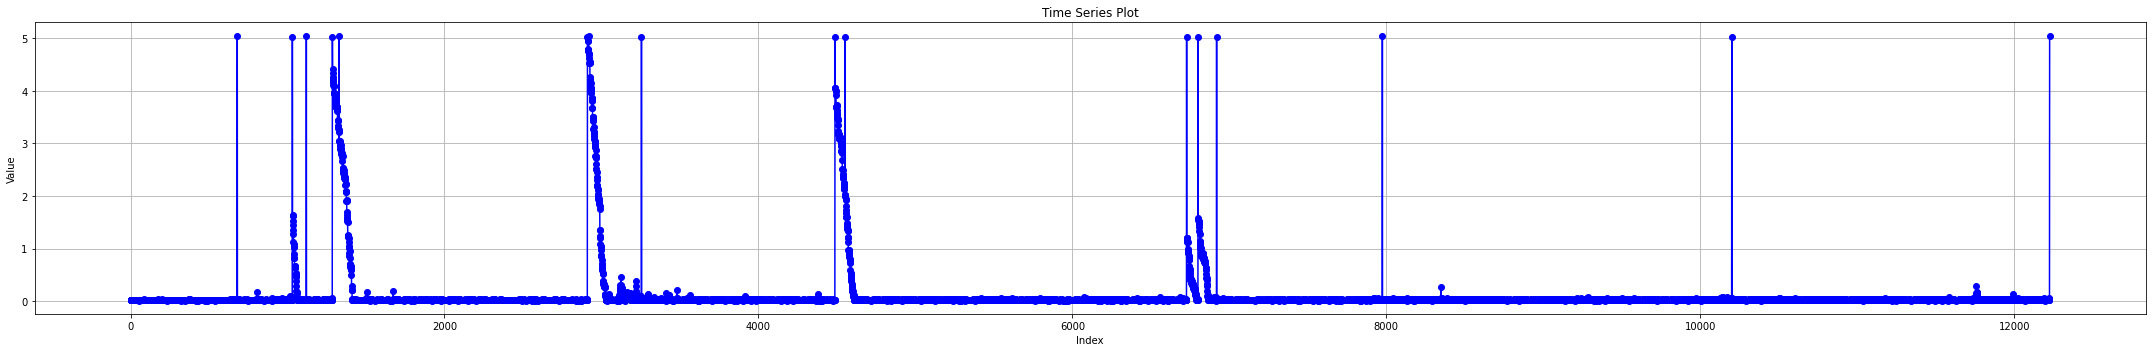

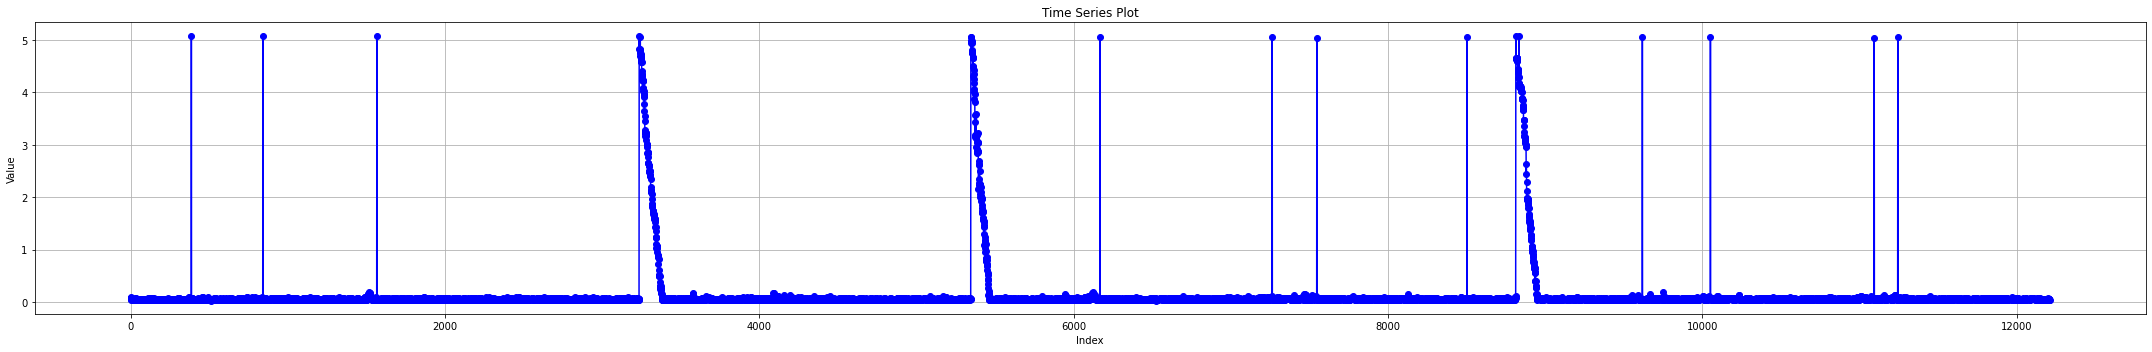

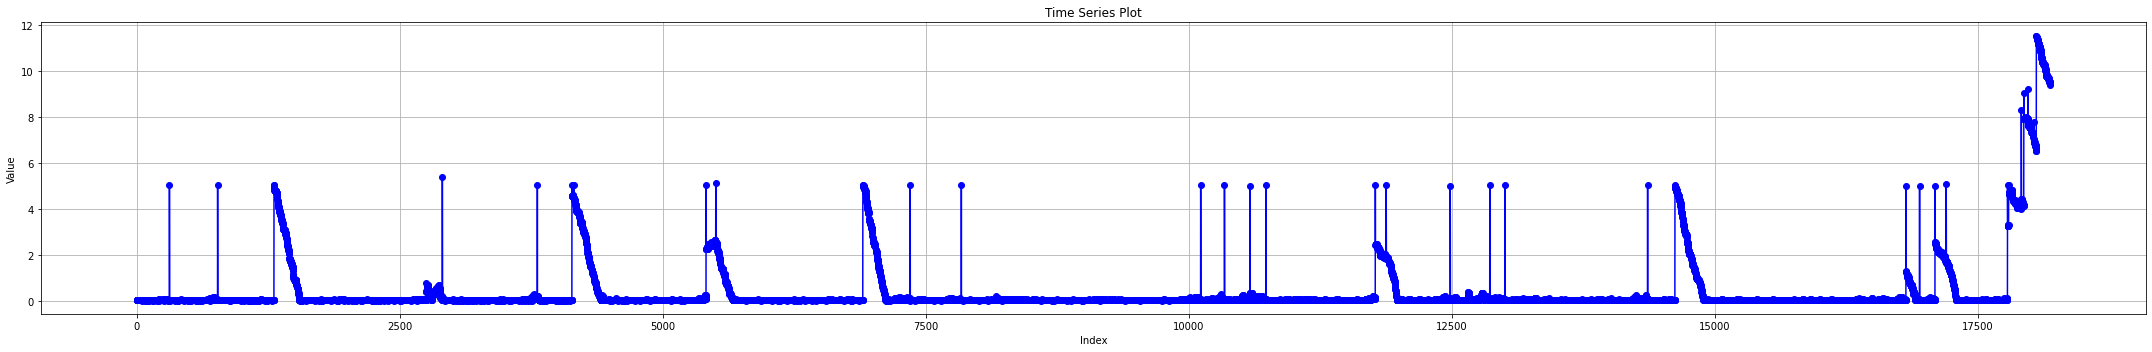

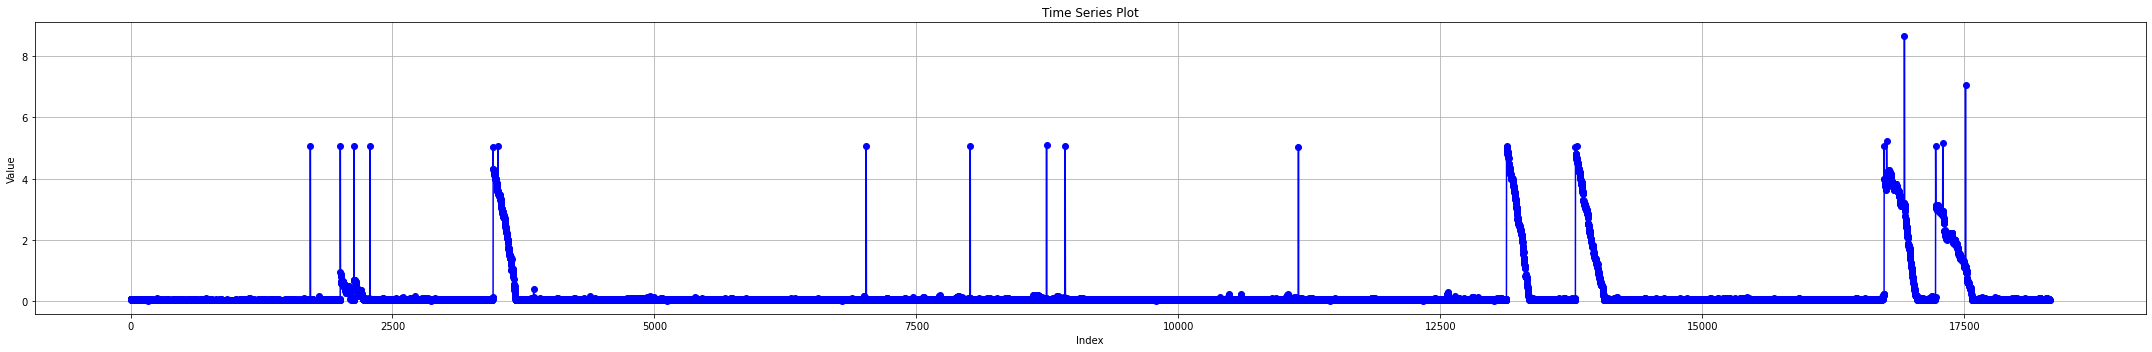

In [23]:
filenames = [
    "../src/new-experiments/auto-600-200-Features.csv",
    "../src/new-experiments/auto-600-200-RawExtract.csv",
    "../src/new-experiments/auto-600-400-Features.csv",
    "../src/new-experiments/auto-600-400-RawExtract.csv",
    "../src/new-experiments/auto-600-600-Features.csv",
    "../src/new-experiments/auto-600-600-RawExtract.csv",
    #     "../src/new-experiments/auto-600-30-Features.csv",
    #     "../src/new-experiments/auto-600-30-RawExtract.csv",
    #     "../src/new-experiments/auto-600-60-Features.csv",
    #     "../src/new-experiments/auto-600-60-RawExtract.csv",
    #     "../src/new-experiments/auto-600-120-Features.csv",
    #     "../src/new-experiments/auto-600-120-RawExtract.csv",
    #     "../src/new-experiments/auto-600-240-Features.csv",
    #     "../src/new-experiments/auto-600-240-RawExtract.csv",
    #     "../src/new-experiments/auto-600-480-Features.csv",
    #     "../src/new-experiments/auto-600-480-RawExtract.csv",
    #
]
for file in filenames:
    print(file)
    plot_csv_as_timeseries(file)
    print()

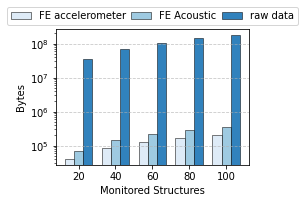

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Define the maximum x-value
max_x = 100

# Define the x values with a small offset for spacing
x_values = np.arange(20, 101, 20)

# Define the width of the bars
bar_width = 5  # Adjust as needed for spacing

# Define the functions
f1 = [(207) * 10 * x for x in x_values]
f2 = [(357) * x * 10 for x in x_values]
f3 = [(177544) * x * 10 for x in x_values]

colors = ["#deebf7", "#9ecae1", "#3182bd"]
patterns = ["--", "xx", ".."]
labels = ["FE accelerometer", "FE Acoustic", "raw data"]

# Plot the bar chart with proper spacing
plt.figure(figsize=(4, 3))
plt.grid(axis="y", linestyle="--", alpha=0.7)

for i, (data, color, pattern) in enumerate(zip([f1, f2, f3], colors, patterns)):
    x_offset = i * bar_width
    plt.bar(
        x_values - bar_width + x_offset,
        data,
        width=bar_width,
        label=labels[i],
        alpha=1,
        color=color,
        # hatch=pattern,
        edgecolor="black",  # Add black border
        linewidth=0.5,  # Adjust the border thickness
    )


# Add a legend
plt.legend()

# Set labels and title
plt.xlabel("Monitored Structures")
plt.ylabel("Bytes")

# Set the y-axis to log scale
plt.yscale("log")

# Set the legend to be horizontal at the top
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.2), ncol=3, columnspacing=0.5)

# Show the plot
plt.xticks(x_values, x_values)  # Show the original x-values on the x-axis
plt.tight_layout()
# plt.show()
plt.savefig(f"payload_size.pdf", format="pdf", bbox_inches="tight")

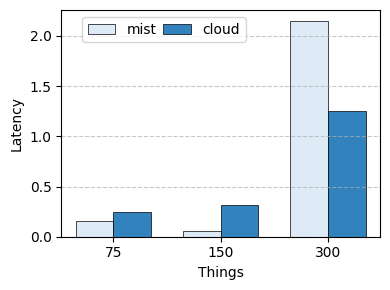

In [118]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Define the maximum x-value
max_x = 100

# Define the width of the bars
bar_width = 0.35  # Adjust as needed for spacing

filename = "../src/new-experiments/iotinuum-latency.csv"

# Define the functions
df = pd.read_csv(filename, delimiter=",")
raw_data = df[df['class'] == 'raw']
feature_data = df[df['class'] == 'feature']
x_values = raw_data['edge-nodes']

colors = ["#deebf7", "#3182bd"]
patterns = ["--", "xx", ".."]
labels = ["mist", "cloud"]

# Get unique categorical values for x-axis
unique_x_values = x_values.unique()
x_indices = np.arange(len(unique_x_values))

# Plot the bar chart with proper spacing
plt.figure(figsize=(4, 3))
plt.grid(axis="y", linestyle="--", alpha=0.7)

for i, (data, color, pattern) in enumerate(zip([raw_data['avg'], feature_data['avg']], colors, patterns)):
    x_offset = i * bar_width
    plt.bar(
        x_indices - bar_width/2 + x_offset,  # Adjusted for even spacing
        data,
        width=bar_width,
        label=labels[i],
        alpha=1,
        color=color,
        edgecolor="black",
        linewidth=0.5,
    )

# Add a legend
plt.legend()

# Set labels and title
plt.xlabel("Things")
plt.ylabel("Latency")

# Set the legend to be horizontal at the top
plt.legend(loc="upper right", bbox_to_anchor=(0.6, 1), ncol=3, columnspacing=0.5)

# Show the plot
plt.xticks(x_indices, unique_x_values)  # Use indices for ticks and categories for labels
plt.tight_layout()
plt.savefig(f"graph.pdf", format="pdf", bbox_inches="tight")
plt.show()


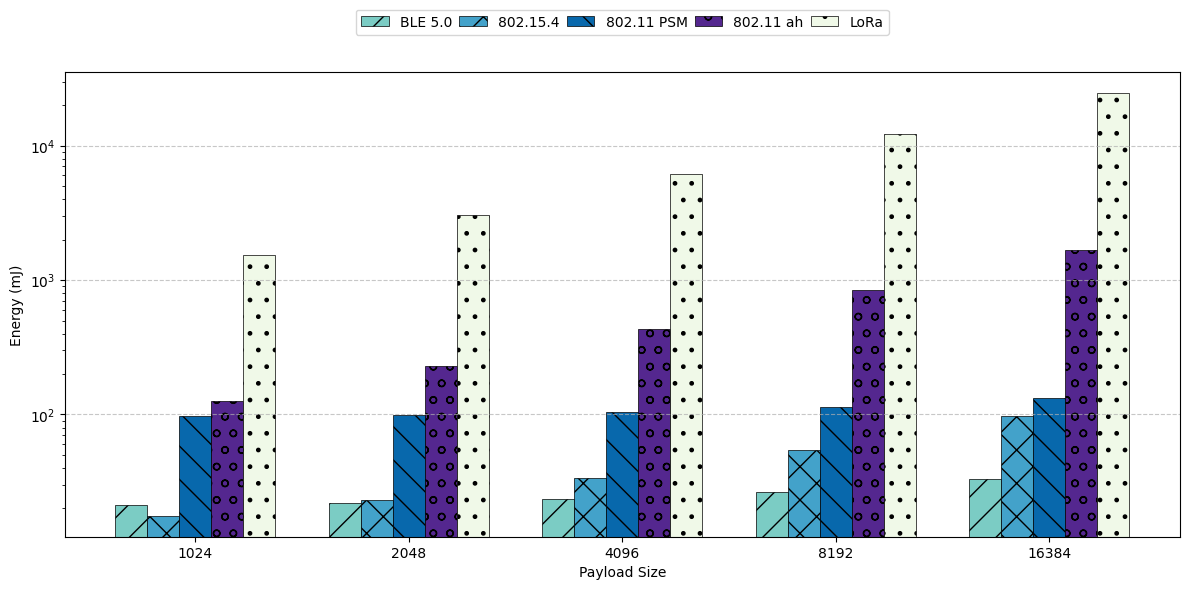

In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the CSV file into a pandas DataFrame
data = pd.read_csv("Energy_MAC4PRO_NoDSP.csv")

# Define the width of the bars
bar_width = 0.15  # Adjust as needed for spacing

# Define the functions (data columns)
functions = ["BLE 5.0", "802.15.4", "802.11 PSM", "802.11 ah", "LoRa"]
# Define colors for each function
colors = ["#7bccc4", "#43a2ca", "#0868ac", "#54278f", "#f0f9e8"]

# Define patterns for each bar
patterns = ["/", "x", "\\", "o", "."]

# Define the payload sizes
payload_sizes = data["Payload"]

# Calculate the x positions for each category
x_positions = np.arange(len(payload_sizes))

# Plot the bar chart with proper spacing, colors, and patterns
plt.figure(figsize=(12, 6))
plt.grid(axis="y", linestyle="--", alpha=0.7)

for i, function in enumerate(functions):
    x_offset = i * bar_width
    plt.bar(
        x_positions + x_offset,
        data[function],
        width=bar_width,
        label=function,
        alpha=1,
        color=colors[i],
        hatch=patterns[i],
        edgecolor="black",  # Add black border
        linewidth=0.5,  # Adjust the border thickness
    )

# Add a legend
plt.legend()

# Set labels and title
plt.xlabel("Payload Size")
plt.ylabel("Energy (mJ)")

# Set the y-axis to log scale
plt.yscale("log")

# Set the x-axis ticks and labels
plt.xticks(x_positions + 0.3, payload_sizes)

# Set the legend to be horizontal at the top
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.15),
    ncol=len(functions),
    columnspacing=0.5,
)

# Show the plot
plt.tight_layout()
plt.savefig("bar_chart_with_border.pdf", format="pdf")
plt.show()

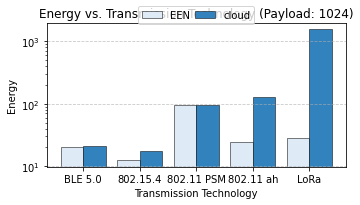

In [134]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the CSV file into a pandas DataFrame
data = pd.read_csv("energy.csv")

# Filter the data for a payload of 1024
filtered_data = data[data["Payload"] == 1024]

# Define the width of the bars
bar_width = 0.4  # Adjust as needed for spacing

# Define the classes to be displayed in the legend
legend_classes = ["EEN", "cloud"]

# Define colors for each class
# colors = ['#7bccc4', '#43a2ca']
colors = ["#deebf7", "#3182bd"]

# Define patterns for each bar
patterns = ["//", "xx"]

# Define the Transmission Technologies
transmission_technologies = filtered_data["Transmission Technology"].unique()

# Calculate the x positions for each category
x_positions = np.arange(len(transmission_technologies))

# Create an empty list to store the handles for the legend
legend_handles = []

# Plot the bar chart with proper spacing, colors, and patterns
plt.figure(figsize=(5, 3))
plt.grid(axis="y", linestyle="--", alpha=0.7)

for i, class_label in enumerate(legend_classes):
    x_offset = i * bar_width

    for j, transmission_technology in enumerate(transmission_technologies):
        # Filter the data for the current class, technology, and payload
        filtered_class_data = filtered_data[
            (filtered_data["Transmission Technology"] == transmission_technology)
            & (filtered_data["FE"] == class_label)
        ]
        if not filtered_class_data.empty:
            # Manually adjust x-positions to avoid repetition
            x_position = x_positions[j] + x_offset
            # Plot the bar and add it to the legend
            bar = plt.bar(
                x_position,
                filtered_class_data["Energy"],
                width=bar_width,
                label=f"{class_label}",
                alpha=1,
                color=colors[i],
                # hatch=patterns[i],
                edgecolor="black",  # Add black border
                linewidth=0.5,  # Adjust the border thickness
            )
            legend_handles.append(bar)

# Set labels and title
plt.xlabel("Transmission Technology")
plt.ylabel("Energy")
plt.title("Energy vs. Transmission Technology (Payload: 1024)")

# Set the y-axis to log scale
plt.yscale("log")

# Adjust x-axis ticks and labels
x_tick_positions = x_positions + (bar_width / 2)  # Center the ticks between bars
plt.xticks(x_tick_positions, transmission_technologies)

# Create the legend with class labels, colors, and patterns
plt.legend(
    handles=[legend_handles[0], legend_handles[5]],
    labels=legend_classes,
    loc="upper center",
    bbox_to_anchor=(0.5, 1.15),
    ncol=len(legend_classes),
    columnspacing=0.5,
)

# Show the plot
plt.tight_layout()
plt.savefig("bar_chart_energy.pdf", format="pdf")
plt.show()

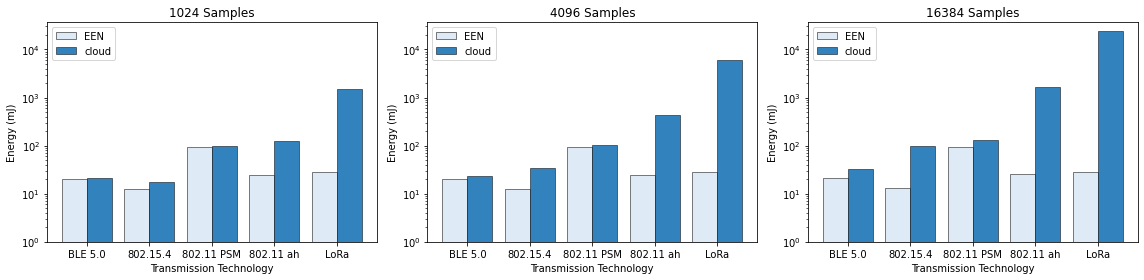

In [163]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Read the CSV file into a pandas DataFrame
data = pd.read_csv("energy.csv")

# Define the width of the bars
bar_width = 0.4  # Adjust as needed for spacing

# Define the classes to be displayed in the legend
legend_classes = ["EEN", "cloud"]

# Define colors for each class
colors = ["#deebf7", "#3182bd"]

# Define patterns for each bar
patterns = ["//", "xx"]

# Define the Payload values
payloads = [1024, 4096, 16384]

# Create a subplot for each payload value
fig, axes = plt.subplots(1, len(payloads), figsize=(16, 4))

max_energy = 0  # Initialize the maximum energy value

for idx, payload in enumerate(payloads):
    # Filter the data for the current payload
    filtered_data = data[data["Payload"] == payload]

    # Define the Transmission Technologies for this payload
    transmission_technologies = filtered_data["Transmission Technology"].unique()

    # Calculate the x positions for each category
    x_positions = np.arange(len(transmission_technologies))

    # Create an empty list to store the handles for the legend
    legend_handles = []

    for i, class_label in enumerate(legend_classes):
        x_offset = i * bar_width

        for j, transmission_technology in enumerate(transmission_technologies):
            # Filter the data for the current class, technology, and payload
            filtered_class_data = filtered_data[
                (filtered_data["Transmission Technology"] == transmission_technology)
                & (filtered_data["FE"] == class_label)
            ]
            if not filtered_class_data.empty:
                # Manually adjust x-positions to avoid repetition
                x_position = x_positions[j] + x_offset
                # Plot the bar and add it to the legend
                bar = axes[idx].bar(
                    x_position,
                    filtered_class_data["Energy"],
                    width=bar_width,
                    label=f"{class_label}",
                    alpha=1,
                    color=colors[i],
                    # hatch=patterns[i],
                    edgecolor="black",  # Add black border
                    linewidth=0.5,  # Adjust the border thickness
                )
                legend_handles.append(bar)

                # Update the maximum energy value if needed
                max_energy = max(max_energy, filtered_class_data["Energy"].max())

    # Set labels and title for each subplot
    axes[idx].set_xlabel("Transmission Technology")
    axes[idx].set_ylabel("Energy (mJ)")
    axes[idx].set_title(f"{payload} Samples", fontweight=500)

    # Set the y-axis to log scale for each subplot and use the same y-max
    axes[idx].set_yscale("log")
    axes[idx].set_ylim(1, 36443)  # Set the same y-max for all subplots

    # Adjust x-axis ticks and labels for each subplot
    x_tick_positions = x_positions + (bar_width / 2)  # Center the ticks between bars
    axes[idx].set_xticks(x_tick_positions)
    axes[idx].set_xticklabels(transmission_technologies)

    # Create the legend with class labels, colors, and patterns for each subplot
    axes[idx].legend(
        handles=[legend_handles[0], legend_handles[5]],
        labels=legend_classes,
        loc="upper left",
        columnspacing=0.5,
    )

# Adjust the layout and display the subplots
plt.tight_layout()
plt.savefig("bar_chart_energy.pdf", format="pdf")
plt.show()